# Fetching Weather Data

In [1]:
!pip install requests pandas

In [2]:
import requests
import pandas as pd

# Function to fetch weather data from Open-Meteo API
def fetch_weather_data(lat, lon, start_date, end_date):
    url = "https://archive-api.open-meteo.com/v1/era5/"
    params = {
        "latitude": lat,
        "longitude": lon,
        "start_date": start_date,
        "end_date": end_date,
        "hourly": "temperature_2m,relative_humidity_2m",
        "timezone": "Europe/Amsterdam"
    }
    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        data = response.json()

        # Debug: Print the raw API response
        print(f"Raw API response: {data}")

        # Extract hourly data
        hourly_data = data.get('hourly', {})
        times = hourly_data.get('time', [])
        temperatures = hourly_data.get('temperature_2m', [])
        humidities = hourly_data.get('relative_humidity_2m', [])

        # Create DataFrame
        weather_df = pd.DataFrame({
            'timestamp': pd.to_datetime(times),
            'temperature_2m': temperatures,
            'relative_humidity_2m': humidities
        })
        # Set the timestamp as the index
        weather_df.set_index('timestamp', inplace=True)
        #renaming the columns
        weather_df.columns = ['Temperature (°C)', 'Relative Humidity (%)']
        return weather_df
    else:
        print(f"Error: Unable to fetch data. Status code: {response.status_code}")
        return pd.DataFrame()

# Fetch weather data for enschede, netherlands
lat = 52.245651
lon = 6.850743



start_date = '2023-07-20'  # Ensure the date is in ISO8601 format
end_date = '2024-06-20'    # Ensure the date is in ISO8601 format
weather_df = fetch_weather_data(lat, lon, start_date, end_date)



# Save weather data to a CSV file for later use
weather_df.to_csv('weather_data.csv',header=True)
# 
weather_df.head()

Raw API response: {'latitude': 52.26713, 'longitude': 6.820702, 'generationtime_ms': 0.9440183639526367, 'utc_offset_seconds': 7200, 'timezone': 'Europe/Amsterdam', 'timezone_abbreviation': 'CEST', 'elevation': 30.0, 'hourly_units': {'time': 'iso8601', 'temperature_2m': '°C', 'relative_humidity_2m': '%'}, 'hourly': {'time': ['2023-07-20T00:00', '2023-07-20T01:00', '2023-07-20T02:00', '2023-07-20T03:00', '2023-07-20T04:00', '2023-07-20T05:00', '2023-07-20T06:00', '2023-07-20T07:00', '2023-07-20T08:00', '2023-07-20T09:00', '2023-07-20T10:00', '2023-07-20T11:00', '2023-07-20T12:00', '2023-07-20T13:00', '2023-07-20T14:00', '2023-07-20T15:00', '2023-07-20T16:00', '2023-07-20T17:00', '2023-07-20T18:00', '2023-07-20T19:00', '2023-07-20T20:00', '2023-07-20T21:00', '2023-07-20T22:00', '2023-07-20T23:00', '2023-07-21T00:00', '2023-07-21T01:00', '2023-07-21T02:00', '2023-07-21T03:00', '2023-07-21T04:00', '2023-07-21T05:00', '2023-07-21T06:00', '2023-07-21T07:00', '2023-07-21T08:00', '2023-07-21T0

,Temperature (°C),Relative Humidity (%)
timestamp,,
2023-07-20 00:00:00,14.7,87
2023-07-20 01:00:00,14.1,89
2023-07-20 02:00:00,14.9,87
2023-07-20 03:00:00,13.4,93
2023-07-20 04:00:00,13.7,94


# Fetching Daily Sunrise and Sunset Times

In [4]:
import requests
import pandas as pd

# Function to fetch daily sunrise and sunset times from Open-Meteo API
def fetch_daily_sun_times(lat, lon, start_date, end_date):
    url = "https://api.open-meteo.com/v1/forecast"
    params = {
        "latitude": lat,
        "longitude": lon,
        "start_date": start_date,
        "end_date": end_date,
        "daily": "sunrise,sunset",
        "timezone": "Europe/Amsterdam"
    }
    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        data = response.json()

        # Extract daily data
        daily_data = data.get('daily', {})
        times = daily_data.get('time', [])
        sunrises = daily_data.get('sunrise', [])
        sunsets = daily_data.get('sunset', [])

        # Create DataFrame with explicit column names
        sun_times_df = pd.DataFrame({
            'timestamp': pd.to_datetime(times),
            'sunrise': pd.to_datetime(sunrises),
            'sunset': pd.to_datetime(sunsets)
        })
        sun_times_df.set_index('timestamp', inplace=True)
        
        # Debug: Print DataFrame to check column names before saving
        print("DataFrame before saving to CSV:")
        print(sun_times_df.head())

        return sun_times_df
    else:
        print(f"Error: Unable to fetch daily sun times. Status code: {response.status_code}")
        return pd.DataFrame()

# Fetch daily sunrise and sunset times for Enschede, Netherlands
lat = 52.245651
lon = 6.850743
start_date = '2023-07-20'
end_date = '2024-05-14'

# Fetch daily sunrise and sunset times
sun_times_df = fetch_daily_sun_times(lat, lon, start_date, end_date)

# Save to CSV with explicit headers
sun_times_df.to_csv('sun_times.csv', header=True, index=True)


DataFrame before saving to CSV:
                       sunrise              sunset
timestamp                                         
2023-07-20 2023-07-20 05:35:00 2023-07-20 21:42:00
2023-07-21 2023-07-21 05:37:00 2023-07-21 21:40:00
2023-07-22 2023-07-22 05:38:00 2023-07-22 21:39:00
2023-07-23 2023-07-23 05:39:00 2023-07-23 21:38:00
2023-07-24 2023-07-24 05:41:00 2023-07-24 21:36:00


In [6]:
# read csv file
sun_times_df = pd.read_csv('sun_times.csv')


,timestamp,sunrise,sunset
0,2023-07-20,2023-07-20 05:35:00,2023-07-20 21:42:00
1,2023-07-21,2023-07-21 05:37:00,2023-07-21 21:40:00
2,2023-07-22,2023-07-22 05:38:00,2023-07-22 21:39:00
3,2023-07-23,2023-07-23 05:39:00,2023-07-23 21:38:00
4,2023-07-24,2023-07-24 05:41:00,2023-07-24 21:36:00


# lights on only when the sun is down vs 8h of light per day

Annual Energy Savings Cost per Container per year: €63.04


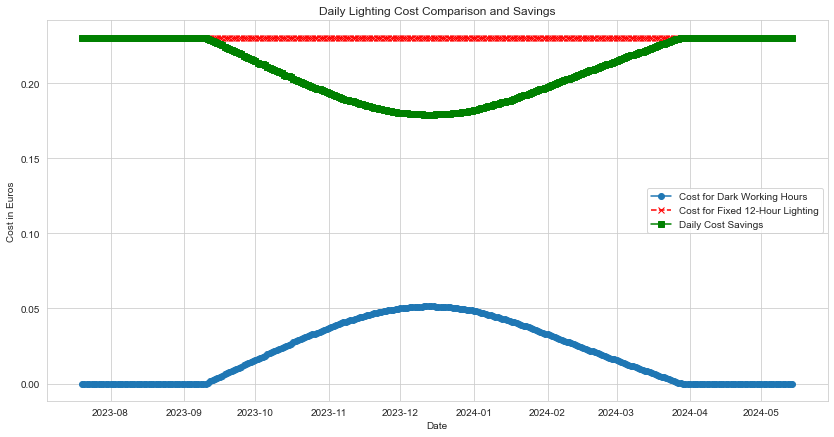

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the sunrise and sunset data
sun_times_df = pd.read_csv('sun_times.csv', parse_dates=['timestamp', 'sunrise', 'sunset'])
sun_times_df.set_index('timestamp', inplace=True)

# Constants
LED_POWER_PER_SQ_M = 3  # watts per square meter
AREA = 20  # square meters
WORKING_START = pd.to_datetime('08:00:00').time()  # 8 AM
WORKING_END = pd.to_datetime('20:00:00').time()  # 8 PM
FIXED_LIGHTING_HOURS = 12  # 12 hours of lighting per day
COST_PER_KWH = 0.32  # €0.32 per kWh

# Function to calculate overlap of dark hours within working hours
def calculate_power_usage(row):
    work_start_today = pd.Timestamp.combine(row.name.date(), WORKING_START)
    work_end_today = pd.Timestamp.combine(row.name.date(), WORKING_END)
    sunset_today = pd.Timestamp.combine(row.name.date(), row['sunset'].time())
    sunrise_next_day = pd.Timestamp.combine(row.name.date(), row['sunrise'].time()) + pd.Timedelta(days=1)

    if sunset_today < work_end_today:
        dark_start = max(work_start_today, sunset_today)
        dark_end = min(sunrise_next_day, work_end_today)
        dark_hours = max((dark_end - dark_start).total_seconds() / 3600, 0)
    else:
        dark_hours = 0

    return dark_hours * LED_POWER_PER_SQ_M * AREA  # watt-hours

# Calculate power usage and cost
sun_times_df['power_usage_dark_working_hours'] = sun_times_df.apply(calculate_power_usage, axis=1)
sun_times_df['fixed_12_hour_lighting'] = FIXED_LIGHTING_HOURS * LED_POWER_PER_SQ_M * AREA
sun_times_df['cost_dark_working_hours'] = (sun_times_df['power_usage_dark_working_hours'] / 1000) * COST_PER_KWH
sun_times_df['cost_fixed_12_hour_lighting'] = (sun_times_df['fixed_12_hour_lighting'] / 1000) * COST_PER_KWH

# Calculate savings
sun_times_df['savings'] = sun_times_df['cost_fixed_12_hour_lighting'] - sun_times_df['cost_dark_working_hours']

# Annual savings
annual_savings = sun_times_df['savings'].sum()
print(f"Annual Energy Savings Cost per Container per year: €{annual_savings:.2f}")

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(sun_times_df.index, sun_times_df['cost_dark_working_hours'], label='Cost for Dark Working Hours', marker='o')
plt.plot(sun_times_df.index, sun_times_df['cost_fixed_12_hour_lighting'], label='Cost for Fixed 12-Hour Lighting', color='red', linestyle='--', marker='x')
plt.plot(sun_times_df.index, sun_times_df['savings'], label='Daily Cost Savings', color='green', linestyle='-', marker='s')
plt.title('Daily Lighting Cost Comparison and Savings')
plt.xlabel('Date')
plt.ylabel('Cost in Euros')
plt.legend()
plt.grid(True)
plt.show()


To compute the cost savings based on the average power costs in the Netherlands (€0.32 per kWh), we need to calculate the daily costs for each lighting scenario—dynamic dark hours during working hours and the fixed 12-hour lighting—and then determine the savings by comparing these costs.
The plot you've shown displays three different lines, each representing a different cost calculation for lighting:

Blue Line: This represents the cost of using lighting only during dark hours that overlap with the working hours (8 AM to 8 PM). This cost varies throughout the year based on the length of daytime and how much of the dark period overlaps with working hours.

Red Dashed Line: This line represents the cost of running the lights for a fixed duration of 12 hours every day. It's a straight line because the cost is fixed per day regardless of the season or daylight hours.

Green Line: This represents the daily cost savings achieved by using lights only during necessary dark hours within working hours compared to the fixed 12-hour lighting schedule. It shows how much you save each day by using an adaptive lighting strategy instead of keeping the lights on for a fixed period every day.



# Introduction
This report outlines the implementation and results of an energy optimization study for lighting in shipping containers. The primary focus was to reduce energy consumption by adapting the lighting hours to overlap only with dark hours during standard working hours, rather than using a fixed lighting schedule. This approach leverages natural light availability and aligns energy usage with actual lighting needs, potentially leading to significant cost savings.

# Objectives
Optimize lighting usage: Adapt lighting to necessary dark hours within standard working hours (8 AM to 8 PM).
Cost analysis: Compare the cost of adaptive lighting with a fixed 12-hour daily lighting schedule.
Annual savings calculation: Quantify the financial benefits of the adaptive lighting strategy over a standard year.
Methodology
Data Preparation
Sunrise and Sunset Times: Data on sunrise and sunset times were collected to determine the natural lighting availability for each day.
Working Hours: Defined as from 8 AM to 8 PM, these hours represent the typical operational period during which lighting is essential if natural light is insufficient.
Calculation Procedures
Dark Hours Overlap: The algorithm calculates the overlap between dark hours (from sunset to sunrise) and the working hours for each day.
Energy Consumption: The energy consumption for lighting is computed based on the overlap hours, using the assumption that lighting consumes 10 watts per square meter in a 20 square meter container.
Cost Estimation: Daily energy costs are calculated using the average electricity price in the Netherlands (€0.32 per kWh).
Annual Savings: The total annual savings are computed by summing up the daily savings obtained from using adaptive lighting versus a fixed lighting schedule.
# Implementation
Python was used for data manipulation and calculations, utilizing libraries such as pandas for data handling and matplotlib for visualization. The process involved:

Loading Data: Sunrise and sunset times were loaded from a CSV file.
Power Usage Calculation: Functions were implemented to calculate daily power usage based on the required dark hours within the working hours.
Cost and Savings Computation: Daily costs and savings were calculated and aggregated to determine the annual savings.
# Results
The implementation demonstrated that adaptive lighting led to significant cost savings compared to a fixed 12-hour lighting schedule. The daily and annual savings were visualized in a plot, showing the fluctuation of costs and savings throughout the year. This fluctuation is attributed to the varying length of daylight across different seasons.

# Future Work
Further studies could explore:

Real-Time Light Sensing: Implement sensors to automatically adjust lighting based on real-time luminosity inside the container.
Integration with Other Systems: Combine lighting controls with other energy management systems for comprehensive energy efficiency improvements.
Broader Applicability: Apply similar strategies to other contexts such as office buildings or public spaces where lighting costs are significant.
This approach sets a precedent for operational efficiency in energy management and can serve as a model for similar applications in various industries.






